<a href="https://colab.research.google.com/github/suhitaghosh10/colab_examples/blob/master/Translation_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as K
!pip install Faker
import nmt_utils
from nmt_utils import load_dataset, preprocess_data, string_to_int, to_categorical, plot_attention_map, int_to_string
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [4]:
m = 10000
dataset, human_vocab, machine_vocab, inv_machine_vocab = load_dataset(m)

100%|██████████| 10000/10000 [00:00<00:00, 14052.71it/s]


In [5]:
dataset

[('9 may 1998', '1998-05-09'),
 ('10.11.19', '2019-11-10'),
 ('9/10/70', '1970-09-10'),
 ('saturday april 28 1990', '1990-04-28'),
 ('thursday january 26 1995', '1995-01-26'),
 ('monday march 7 1983', '1983-03-07'),
 ('sunday may 22 1988', '1988-05-22'),
 ('08 jul 2008', '2008-07-08'),
 ('8 sep 1999', '1999-09-08'),
 ('thursday january 1 1981', '1981-01-01'),
 ('monday may 22 1995', '1995-05-22'),
 ('friday june 16 1978', '1978-06-16'),
 ('18 jun 1999', '1999-06-18'),
 ('thursday october 8 1987', '1987-10-08'),
 ('1 april 2008', '2008-04-01'),
 ('6 september 2012', '2012-09-06'),
 ('thursday november 12 1981', '1981-11-12'),
 ('19 08 11', '2011-08-19'),
 ('25 august 2007', '2007-08-25'),
 ('saturday september 18 1982', '1982-09-18'),
 ('friday february 25 1994', '1994-02-25'),
 ('25.03.20', '2020-03-25'),
 ('15.11.19', '2019-11-15'),
 ('march 19 1976', '1976-03-19'),
 ('20 feb 2006', '2006-02-20'),
 ('17.01.20', '2020-01-17'),
 ('17 jan 1998', '1998-01-17'),
 ('24 oct 2009', '2009-10-2

In [6]:
human_vocab

{' ': 0,
 '.': 1,
 '/': 2,
 '0': 3,
 '1': 4,
 '2': 5,
 '3': 6,
 '4': 7,
 '5': 8,
 '6': 9,
 '7': 10,
 '8': 11,
 '9': 12,
 '<pad>': 36,
 '<unk>': 35,
 'a': 13,
 'b': 14,
 'c': 15,
 'd': 16,
 'e': 17,
 'f': 18,
 'g': 19,
 'h': 20,
 'i': 21,
 'j': 22,
 'l': 23,
 'm': 24,
 'n': 25,
 'o': 26,
 'p': 27,
 'r': 28,
 's': 29,
 't': 30,
 'u': 31,
 'v': 32,
 'w': 33,
 'y': 34}

In [7]:
machine_vocab

{'-': 0,
 '0': 1,
 '1': 2,
 '2': 3,
 '3': 4,
 '4': 5,
 '5': 6,
 '6': 7,
 '7': 8,
 '8': 9,
 '9': 10}

In [8]:
inv_machine_vocab

{0: '-',
 1: '0',
 2: '1',
 3: '2',
 4: '3',
 5: '4',
 6: '5',
 7: '6',
 8: '7',
 9: '8',
 10: '9'}

In [14]:
Tx = 30
Ty = 10
X, Y, Xoh, Yoh = preprocess_data(dataset, human_vocab, machine_vocab, Tx, Ty)

print("X.shape:", X.shape)
print("Y.shape:", Y.shape)
print("Xoh.shape:", Xoh.shape)
print("Yoh.shape:", Yoh.shape)

X.shape: (10000, 30)
Y.shape: (10000, 10)
Xoh.shape: (10000, 30, 37)
Yoh.shape: (10000, 10, 11)


In [15]:

X[0]

array([12,  0, 24, 13, 34,  0,  4, 12, 12, 11, 36, 36, 36, 36, 36, 36, 36,
       36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36])

In [16]:
index = 0
print("Source date:", dataset[index][0])
print("Target date:", dataset[index][1])
print()
print("Source after preprocessing (indices):", X[index])
print("Target after preprocessing (indices):", Y[index])
print()
print("Source after preprocessing (one-hot):", Xoh[index])
print("Target after preprocessing (one-hot):", Yoh[index])

Source date: 9 may 1998
Target date: 1998-05-09

Source after preprocessing (indices): [12  0 24 13 34  0  4 12 12 11 36 36 36 36 36 36 36 36 36 36 36 36 36 36
 36 36 36 36 36 36]
Target after preprocessing (indices): [ 2 10 10  9  0  1  6  0  1 10]

Source after preprocessing (one-hot): [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
Target after preprocessing (one-hot): [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [0]:
from tensorflow.keras.layers import RepeatVector, Concatenate, Dense, Activation, Dot, LSTM, Input, Bidirectional
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from nmt_utils import softmax
import numpy as np


In [0]:
#attention unit
K.clear_session()

# Defined shared layers as global variables
repeator = RepeatVector(Tx)
concatenator = Concatenate(axis=-1)
densor1 = Dense(10, activation = "tanh")
densor2 = Dense(1, activation = "relu")
activator = Activation(softmax, name='attention_weights') # We are using a custom softmax(axis = 1) loaded in this notebook
dotor = Dot(axes = 1)

In [0]:
# GRADED FUNCTION: one_step_attention

def one_step_attention(a, s_prev):
    """
    Performs one step of attention: Outputs a context vector computed as a dot product of the attention weights
    "alphas" and the hidden states "a" of the Bi-LSTM.
    
    Arguments:
    a -- hidden state output of the Bi-LSTM, numpy-array of shape (m, Tx, 2*n_a)
    s_prev -- previous hidden state of the (post-attention) LSTM, numpy-array of shape (m, n_s)
    
    Returns:
    context -- context vector, input of the next (post-attetion) LSTM cell
    """
    
    ### START CODE HERE ###
    # Use repeator to repeat s_prev to be of shape (m, Tx, n_s) so that you can concatenate it with all hidden states "a" (≈ 1 line)
    s_prev = repeator(s_prev)
    # Use concatenator to concatenate a and s_prev on the last axis (≈ 1 line)
    concat = concatenator([a, s_prev]) # (m, Tx, n_s+n_a)
    # Use densor1 to propagate concat through a small fully-connected neural network to compute the "intermediate energies" variable e. (≈1 lines)
    e = densor1(concat)
    # Use densor2 to propagate e through a small fully-connected neural network to compute the "energies" variable energies. (≈1 lines)
    energies = densor2(e)
    # Use "activator" on "energies" to compute the attention weights "alphas" (≈ 1 line)
    alphas = activator(energies)
    # Use dotor together with "alphas" and "a" to compute the context vector to be given to the next (post-attention) LSTM-cell (≈ 1 line)
    context = dotor([alphas,a])
    ### END CODE HERE ###
    
    return context

In [0]:
n_a = 32
n_s = 64
post_activation_LSTM_cell = LSTM(n_s, return_state = True)
output_layer = Dense(len(machine_vocab), activation=softmax)

In [0]:
# GRADED FUNCTION: model

def model(Tx, Ty, n_a, n_s, human_vocab_size, machine_vocab_size):
    """
    Arguments:
    Tx -- length of the input sequence
    Ty -- length of the output sequence
    n_a -- hidden state size of the Bi-LSTM
    n_s -- hidden state size of the post-attention LSTM
    human_vocab_size -- size of the python dictionary "human_vocab"
    machine_vocab_size -- size of the python dictionary "machine_vocab"

    Returns:
    model -- Keras model instance
    """
    
    # Define the inputs of your model with a shape (Tx,)
    # Define s0 and c0, initial hidden state for the decoder LSTM of shape (n_s,)
    X = Input(shape=(Tx, human_vocab_size))
    s0 = Input(shape=(n_s,), name='s0')
    c0 = Input(shape=(n_s,), name='c0')
    s = s0
    c = c0
    
    # Initialize empty list of outputs
    outputs = []
    
    ### START CODE HERE ###
    
    # Step 1: Define your pre-attention Bi-LSTM. Remember to use return_sequences=True. (≈ 1 line)
    a = Bidirectional(LSTM(n_a, return_sequences=True))(X)
    
    # Step 2: Iterate for Ty steps
    for t in range(Ty):
    
        # Step 2.A: Perform one step of the attention mechanism to get back the context vector at step t (≈ 1 line)
        context = one_step_attention(a, s)
        
        # Step 2.B: Apply the post-attention LSTM cell to the "context" vector.
        # Don't forget to pass: initial_state = [hidden state, cell state] (≈ 1 line)
        s, _, c = post_activation_LSTM_cell(context,initial_state=[s, c])
        
        # Step 2.C: Apply Dense layer to the hidden state output of the post-attention LSTM (≈ 1 line)
        out = output_layer(s)
        
        # Step 2.D: Append "out" to the "outputs" list (≈ 1 line)
        outputs.append(out)
    
    # Step 3: Create model instance taking three inputs and returning the list of outputs. (≈ 1 line)
    model = Model(inputs=[X, s0, c0], outputs=outputs)
    
    ### END CODE HERE ###
    
    return model

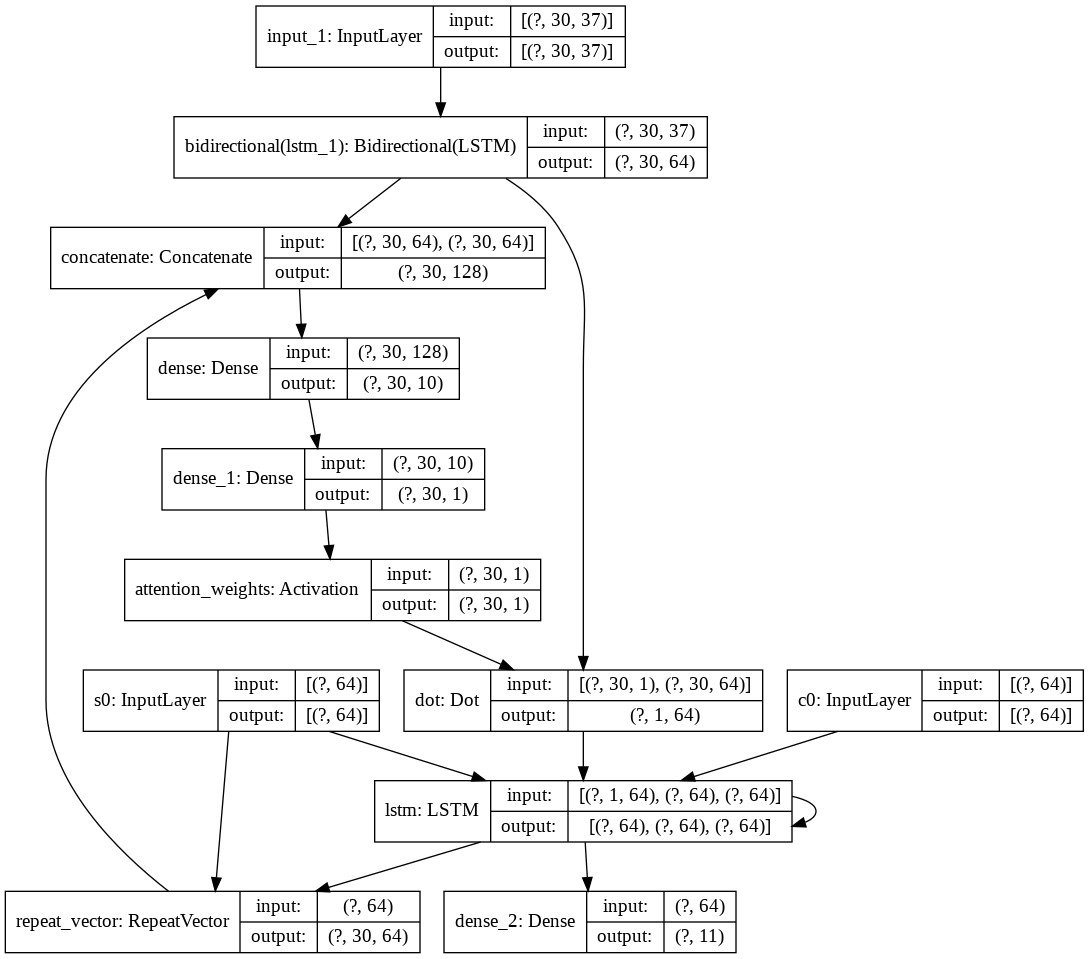

In [37]:
model = model(Tx, Ty, n_a, n_s, len(human_vocab), len(machine_vocab))
plot_model(model, to_file='model.png', show_shapes=True)

In [0]:
opt = Adam(lr=0.005, beta_1=0.9, beta_2=0.999, decay=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
s0 = np.zeros((m, n_s))
c0 = np.zeros((m, n_s))
outputs = list(Yoh.swapaxes(0,1))

In [40]:
print(Xoh.shape, Yoh.swapaxes(0,1).shape)

(10000, 30, 37) (10, 10000, 11)


In [41]:
model.fit([Xoh, s0, c0], outputs, epochs=100, batch_size=100)

Epoch 1/100
100/100 [==============================] - 8s 83ms/step - loss: 16.4369 - dense_2_loss: 1.1428 - dense_2_1_loss: 0.8609 - dense_2_2_loss: 1.6345 - dense_2_3_loss: 2.7464 - dense_2_4_loss: 0.8016 - dense_2_5_loss: 1.3166 - dense_2_6_loss: 2.6652 - dense_2_7_loss: 0.9442 - dense_2_8_loss: 1.7163 - dense_2_9_loss: 2.6083 - dense_2_accuracy: 0.5467 - dense_2_1_accuracy: 0.7669 - dense_2_2_accuracy: 0.3374 - dense_2_3_accuracy: 0.0791 - dense_2_4_accuracy: 0.9250 - dense_2_5_accuracy: 0.3189 - dense_2_6_accuracy: 0.0581 - dense_2_7_accuracy: 0.9632 - dense_2_8_accuracy: 0.2285 - dense_2_9_accuracy: 0.0943
Epoch 2/100
100/100 [==============================] - 8s 81ms/step - loss: 9.0856 - dense_2_loss: 0.1506 - dense_2_1_loss: 0.1378 - dense_2_2_loss: 1.0285 - dense_2_3_loss: 2.1779 - dense_2_4_loss: 0.0289 - dense_2_5_loss: 0.3791 - dense_2_6_loss: 1.9158 - dense_2_7_loss: 0.0164 - dense_2_8_loss: 1.0713 - dense_2_9_loss: 2.1794 - dense_2_accuracy: 0.9578 - dense_2_1_accuracy: 

In [0]:
model.load_weights('model.h5')

In [43]:
EXAMPLES = ['3 May 1979', '5 April 09', '21th of August 2016', 'Tue 10 Jul 2007', 'Saturday May 9 2018', 'March 3 2001', 'March 3rd 2001', '1 March 2001']
s0 = np.zeros((1, n_s))
c0 = np.zeros((1, n_s))
for example in EXAMPLES:
    
    source = string_to_int(example, Tx, human_vocab)
    print(len(source), source)
    source = np.array(list(map(lambda x: to_categorical(x, num_classes=len(human_vocab)), source))).swapaxes(0,1)
    source = source.reshape((1,source.shape[1], source.shape[0]))
    print(source.shape)
    print(s0.shape)
    print(c0.shape)
    prediction = model.predict([source, s0, c0])
    prediction = np.argmax(prediction, axis = -1)
    output = [inv_machine_vocab[int(i)] for i in prediction]
    
    print("source:", example)
    print("output:", ''.join(output))

30 [6, 0, 24, 13, 34, 0, 4, 12, 10, 12, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36]
(1, 30, 37)
(1, 64)
(1, 64)
source: 3 May 1979
output: 1018-09-19
30 [8, 0, 13, 27, 28, 21, 23, 0, 3, 12, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36]
(1, 30, 37)
(1, 64)
(1, 64)
source: 5 April 09
output: 2018-07-19
30 [5, 4, 30, 20, 0, 26, 18, 0, 13, 31, 19, 31, 29, 30, 0, 5, 3, 4, 9, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36]
(1, 30, 37)
(1, 64)
(1, 64)
source: 21th of August 2016
output: 2015-09-11
30 [30, 31, 17, 0, 4, 3, 0, 22, 31, 23, 0, 5, 3, 3, 10, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36]
(1, 30, 37)
(1, 64)
(1, 64)
source: Tue 10 Jul 2007
output: 1913-08-19
30 [29, 13, 30, 31, 28, 16, 13, 34, 0, 24, 13, 34, 0, 12, 0, 5, 3, 4, 11, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36]
(1, 30, 37)
(1, 64)
(1, 64)
source: Saturday May 9 2018
output: 2014-19-11
30 [24, 13, 28, 15, 20, 0, 6, 0, 5, 3, 3, 4, 36, 36, 36, 3

In [74]:
"""
    Plot the attention map.
  
    """
text = "10th of March 1986"
attention_map = np.zeros((10, 30))
n_s = 64
s0 = np.zeros((1, n_s))
c0 = np.zeros((1, n_s))
layer = model.layers[6]
encoded = np.array(string_to_int(text, Tx, human_vocab)).reshape((1, 30))
encoded = np.array(list(map(lambda x: to_categorical(x, num_classes=len(human_vocab)), encoded)))
f = K.function(model.inputs, [layer.get_output_at(t) for t in range(Ty)])
r = f([encoded, s0, c0])
for t in range(Ty):
        for t_prime in range(Tx):
            attention_map[t][t_prime] = r[t][0,t_prime,0]
prediction = model.predict([encoded, s0, c0])
print(prediction)

[array([[6.9649835e-11, 2.8354171e-07, 9.9997723e-01, 9.5484702e-06,
        9.7347579e-09, 2.5590829e-09, 5.0966973e-09, 7.5974803e-08,
        2.7561633e-08, 7.1881509e-06, 5.6621657e-06]], dtype=float32), array([[1.8653593e-13, 7.2025841e-06, 8.6547431e-07, 7.0130268e-10,
        6.7578559e-10, 2.7806555e-09, 1.0447052e-08, 2.4508386e-08,
        5.0701981e-08, 2.0934833e-05, 9.9997091e-01]], dtype=float32), array([[1.1407832e-10, 3.4485703e-07, 6.1203755e-05, 7.8603435e-09,
        1.3293165e-07, 1.8209901e-07, 1.0563513e-09, 8.3287005e-06,
        6.6052447e-04, 9.9892730e-01, 3.4189754e-04]], dtype=float32), array([[1.5277484e-04, 2.5684923e-05, 2.5224865e-05, 2.6536339e-03,
        7.3728926e-04, 5.6352169e-06, 1.3995748e-04, 9.9452519e-01,
        1.7612471e-04, 1.5195748e-03, 3.8914604e-05]], dtype=float32), array([[9.9999607e-01, 7.0816014e-08, 2.6932032e-09, 8.8018723e-08,
        3.3937968e-06, 3.0737070e-08, 1.2291622e-08, 2.1263970e-07,
        3.7253998e-11, 3.8134211e-0

In [75]:
predicted_text = []
for i in range(len(prediction)):
    predicted_text.append(int(np.argmax(prediction[i], axis=1)))
        
predicted_text = list(predicted_text)

predicted_text = int_to_string(predicted_text, inv_machine_vocab)
print(predicted_text)
text_ = list(text)

['1', '9', '8', '6', '-', '0', '3', '-', '1', '0']


Text(0, 0.5, 'Output Sequence')

<Figure size 432x288 with 0 Axes>

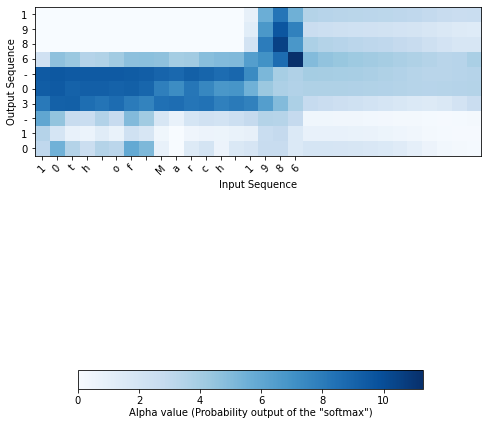

In [76]:
# get the lengths of the string
    input_length = len(text)
    output_length = Ty
    
    # Plot the attention_map
    plt.clf()
    f = plt.figure(figsize=(8, 8.5))
    ax = f.add_subplot(1, 1, 1)

    # add image
    i = ax.imshow(attention_map, interpolation='nearest', cmap='Blues')
    # add colorbar
    cbaxes = f.add_axes([0.2, 0, 0.6, 0.03])
    cbar = f.colorbar(i, cax=cbaxes, orientation='horizontal')
    cbar.ax.set_xlabel('Alpha value (Probability output of the "softmax")', labelpad=2)
    # add labels
    ax.set_yticks(range(output_length))
    ax.set_yticklabels(predicted_text[:output_length])

    ax.set_xticks(range(input_length))
    ax.set_xticklabels(text_[:input_length], rotation=45)

    ax.set_xlabel('Input Sequence')
    ax.set_ylabel('Output Sequence')